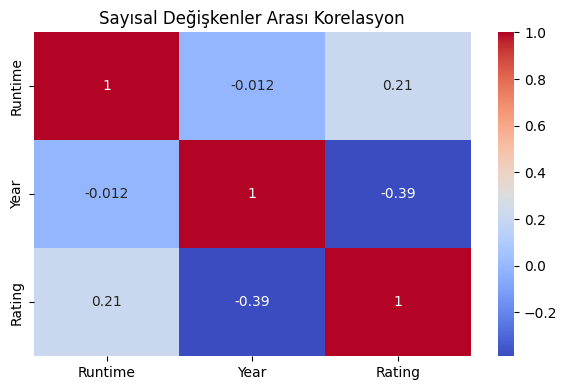

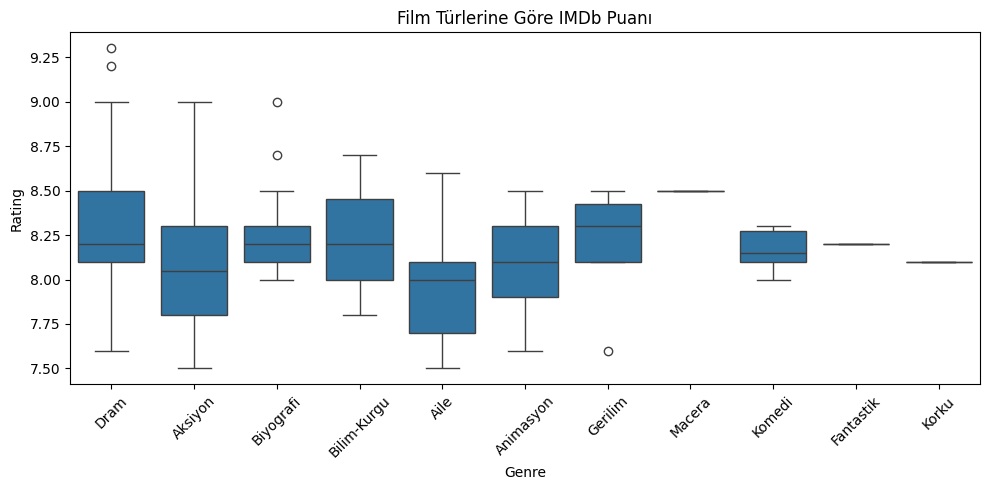

ANOVA p-değeri (Genre): 0.002


<ipython-input-9-d03cd9a69ac3>:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


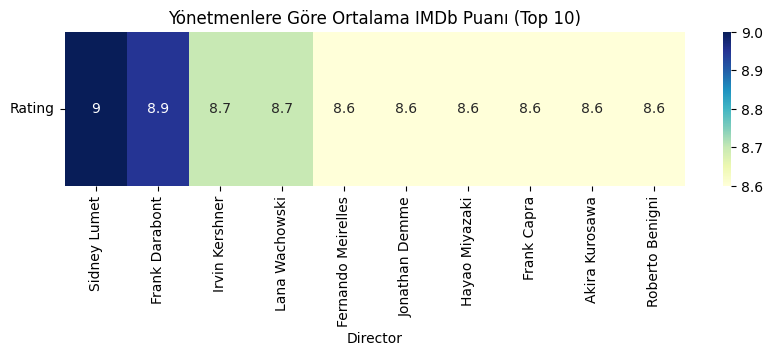

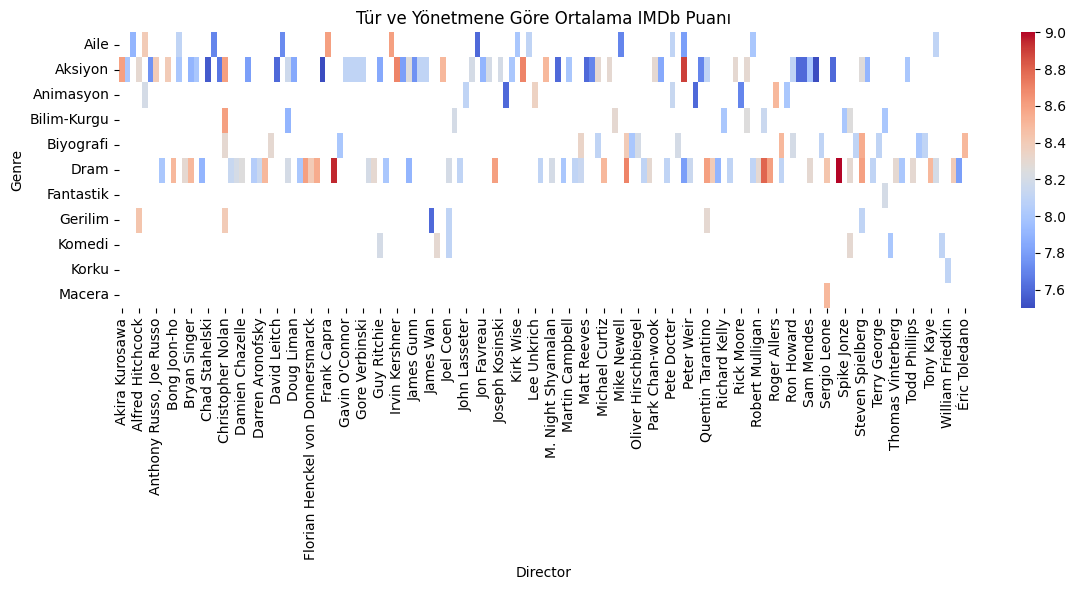

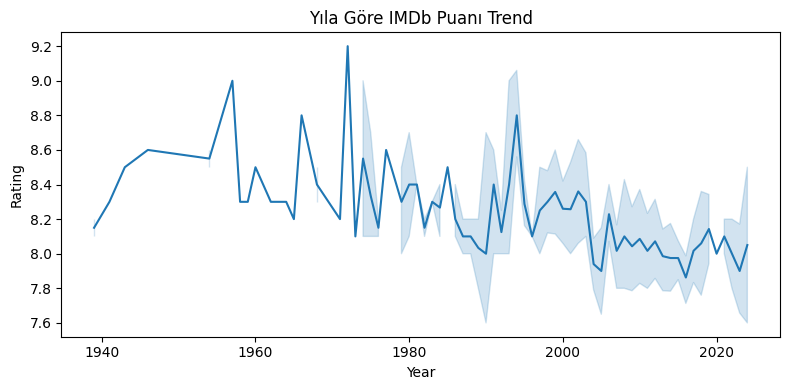


Regresyon Modeli Performansı:
R2 Score: 0.0211
RMSE: 0.3423


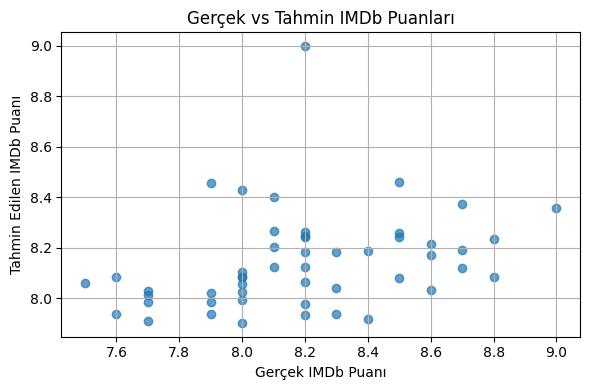

In [9]:
# 📚 Gerekli kütüphaneleri yükle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor  # ✅ Eksik olan bu satır eklendi

# 1. 📥 Excel dosyasını oku
df = pd.read_excel("imdb_top_ozet.xlsx")

# 2. 🎬 Süre sütununu temizle (Dak. ifadesini kaldır ve float'a çevir)
df["Runtime"] = df["Runtime"].str.replace(" Dak.", "").astype(float)

# 3. 🔍 Sayısal değişkenler arası korelasyon matrisi
plt.figure(figsize=(6, 4))
sns.heatmap(df[["Runtime", "Year", "Rating"]].corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.tight_layout()
plt.show()

# 4. 📦 Film türlerine göre IMDb puanı dağılımı (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x="Genre", y="Rating", data=df)
plt.title("Film Türlerine Göre IMDb Puanı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. 🧪 ANOVA testi: IMDb puanları türler arasında farklı mı?
anova_result = stats.f_oneway(*[group["Rating"].values for name, group in df.groupby("Genre")])
print("ANOVA p-değeri (Genre):", round(anova_result.pvalue, 4))

# 6. 🎬 Top 10 yönetmenin ortalama IMDb puanı
director_scores = df.groupby("Director")["Rating"].mean().sort_values(ascending=False).head(10)

# 7. 🔥 Yönetmen puanları için heatmap
heatmap_df = pd.DataFrame(director_scores).T
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.title("Yönetmenlere Göre Ortalama IMDb Puanı (Top 10)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 8. 🎭 Tür ve yönetmene göre ortalama IMDb puanı (pivot tablo ve heatmap)
pivot = df.pivot_table(values="Rating", index="Genre", columns="Director", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="coolwarm", annot=False)
plt.title("Tür ve Yönetmene Göre Ortalama IMDb Puanı")
plt.tight_layout()
plt.show()

# 9. 📈 Yıla göre IMDb puanı trendi
plt.figure(figsize=(8, 4))
sns.lineplot(x="Year", y="Rating", data=df.sort_values("Year"))
plt.title("Yıla Göre IMDb Puanı Trend")
plt.tight_layout()
plt.show()

# 10. 🔢 Kategorik değişkenleri sayısallaştır
le_genre = LabelEncoder()
le_director = LabelEncoder()
df["Genre_encoded"] = le_genre.fit_transform(df["Genre"])
df["Director_encoded"] = le_director.fit_transform(df["Director"])


# 11. Regresyon modeli oluştur ve değerlendir
X = df[["Genre_encoded", "Director_encoded", "Runtime", "Year"]]
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nRegresyon Modeli Performansı:")
print("R2 Score:", round(r2_score(y_test, y_pred), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))



# 12. 🎯 Gerçek vs Tahmin IMDb puanı grafiği
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Gerçek IMDb Puanı")
plt.ylabel("Tahmin Edilen IMDb Puanı")
plt.title("Gerçek vs Tahmin IMDb Puanları")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# 1. 🤖 Random Forest Regressor modeli oluştur ve değerlendir
X = df[["Genre_encoded", "Director_encoded", "Runtime", "Year"]]
y = df["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\nRandom Forest Regressor Performansı:")
print("R2 Score:", round(r2_score(y_test, y_pred), 4))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))


Random Forest Regressor Performansı:
R2 Score: 0.0437
RMSE: 0.3383
